In [1]:
from example import filter_sin
import matplotlib.pyplot as plt

In [4]:
import torch

In [2]:
means, smoothed_means, covariances, smoothed_covariances, x, z = filter_sin(order=1, n=100, measurement_std=0.1, amplitude=1.0, nans=False)

Parameters
Kalman order: 1
Measurement noise: 0.1
Process noise: 0.025132741228718346
Data: z(t) = measurement_noise * N(0, 1) + sin(w0 t)
Using w0=0.12566370614359174 for 100 points
KalmanFilter()

Filtering MSE: 0.00459674745798111


In [10]:
amplitude = 1.0
order = 1
n = 100
w0 = 4 * torch.pi / n

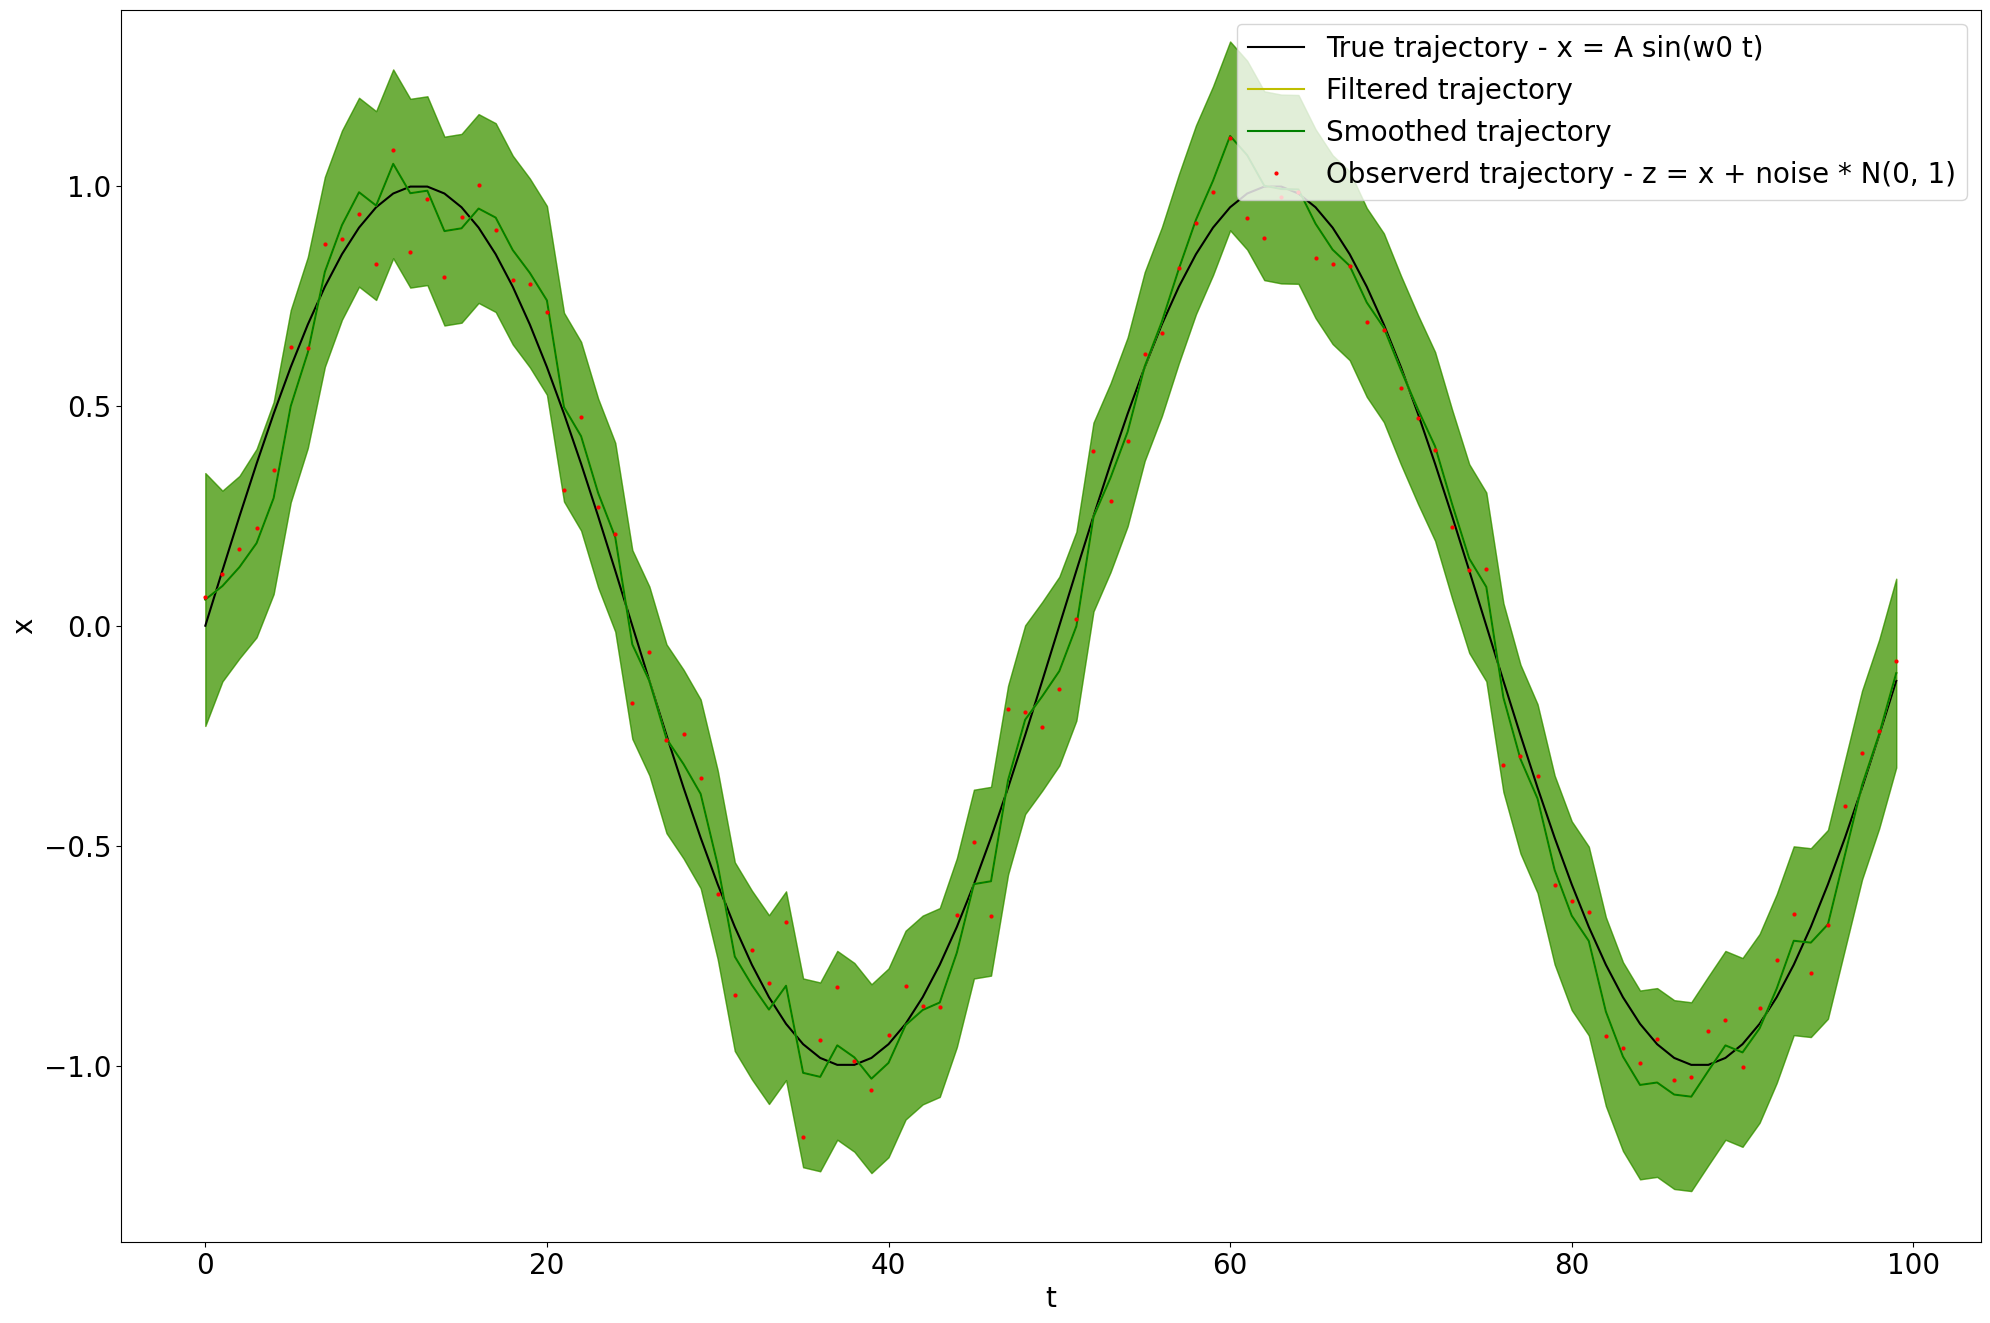

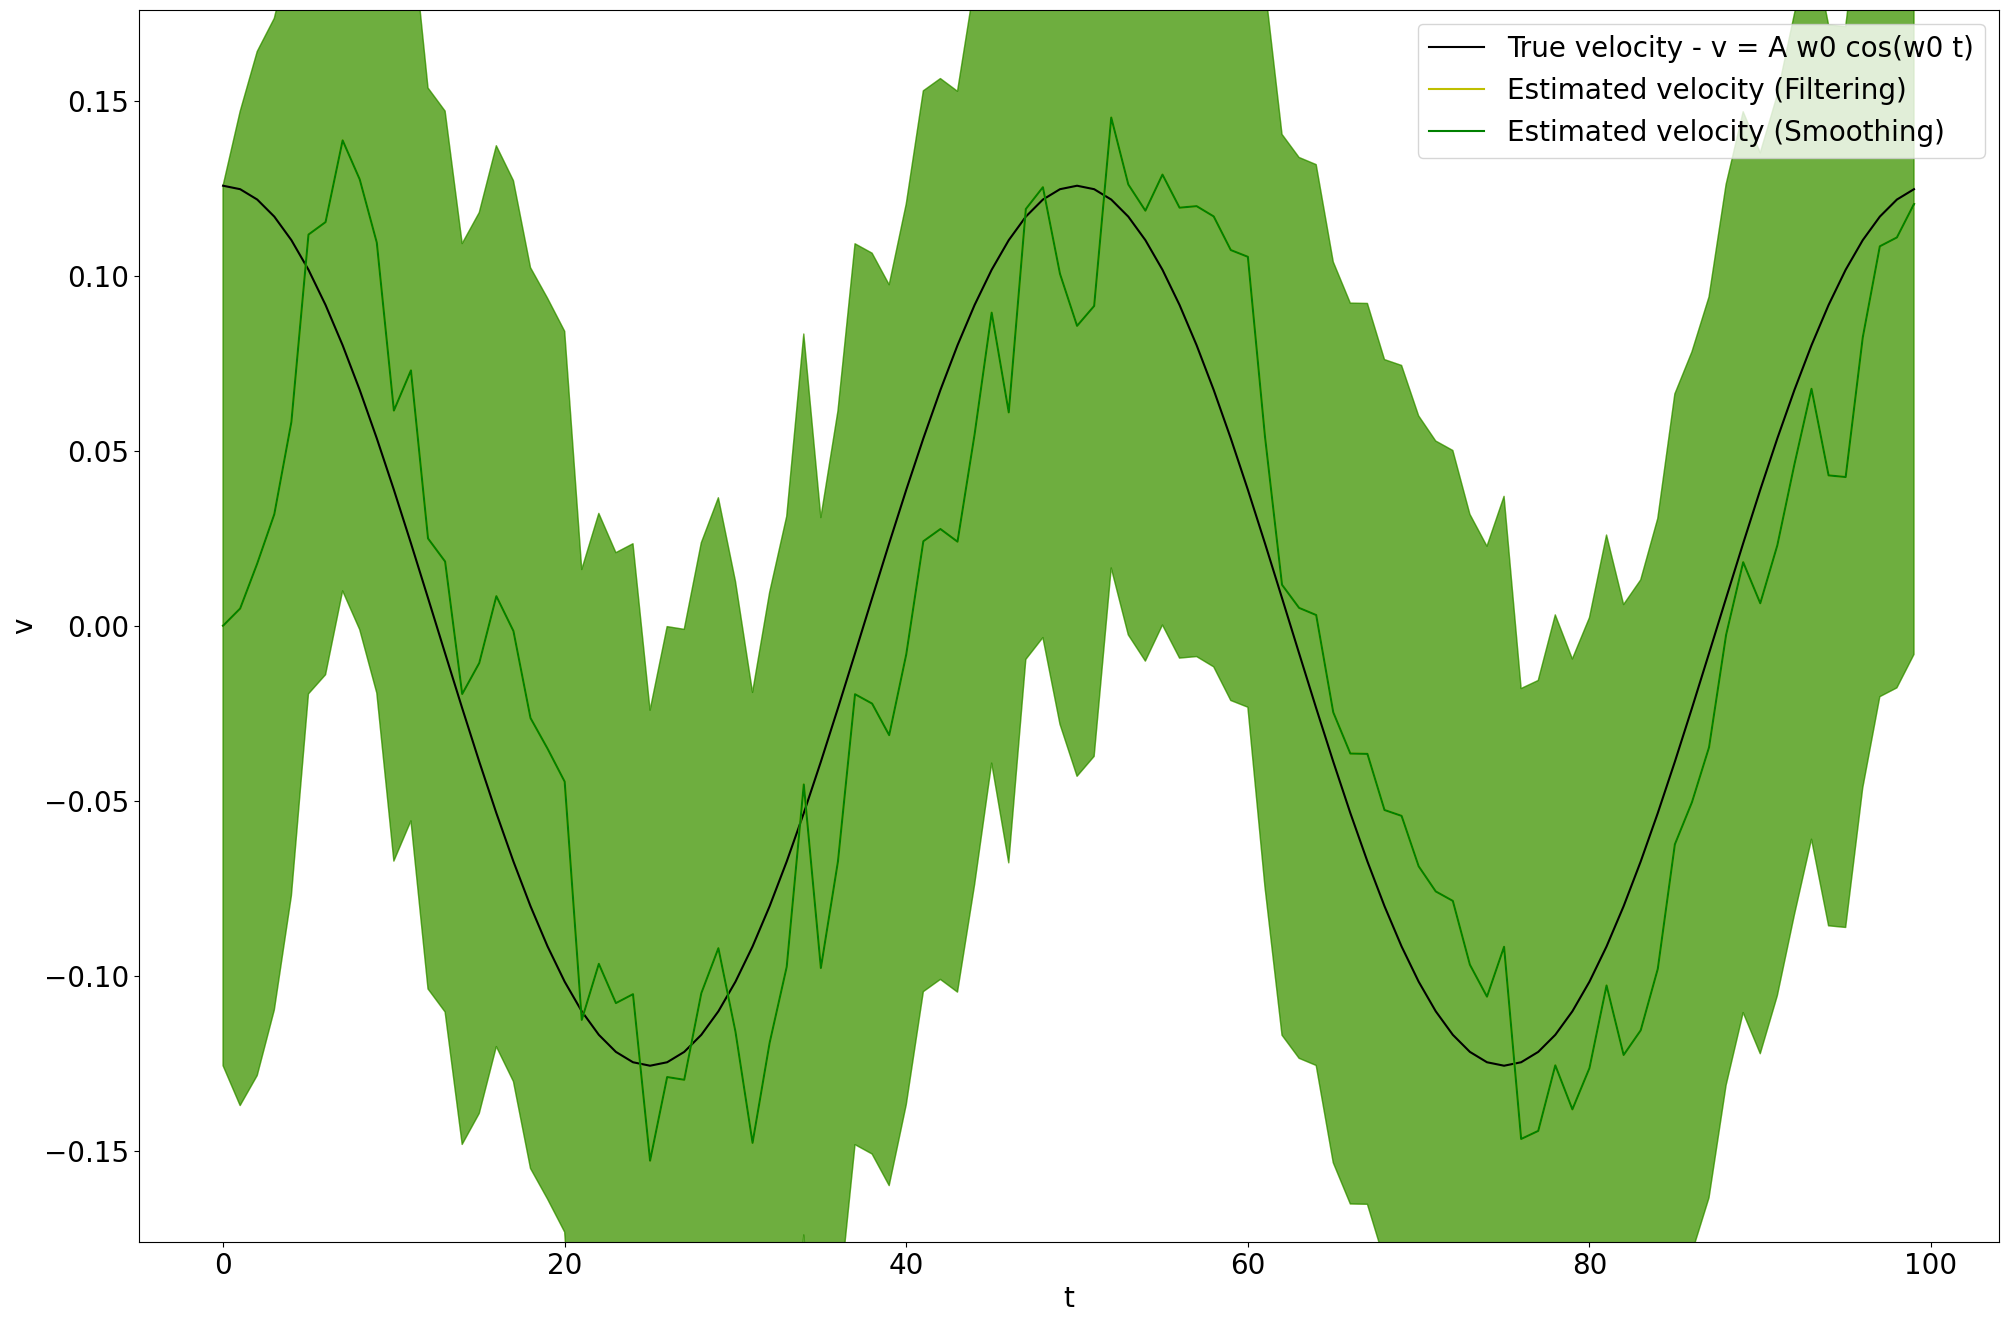

In [11]:
plt.rcParams["font.size"] = 20

plt.figure(figsize=(24, 16))
plt.plot(x[..., 0, 0], color="k", label="True trajectory - x = A sin(w0 t)")
plt.plot(means[:, 0, 0], color="y", label="Filtered trajectory")
plt.plot(smoothed_means[:, 0, 0], color="g", label="Smoothed trajectory")
plt.plot(z[..., 0, 0], "o", color="r", markersize=2.0, label="Observerd trajectory - z = x + noise * N(0, 1)")

mini = means[:, 0, 0] - 3 * covariances[:, 0, 0].sqrt()
maxi = means[:, 0, 0] + 3 * covariances[:, 0, 0].sqrt()
plt.fill_between(torch.arange(len(mini)), mini, maxi, color="y", alpha=0.5)

mini = smoothed_means[:, 0, 0] - 3 * smoothed_covariances[:, 0, 0].sqrt()
maxi = smoothed_means[:, 0, 0] + 3 * smoothed_covariances[:, 0, 0].sqrt()
plt.fill_between(torch.arange(len(mini)), mini, maxi, color="g", alpha=0.5)

plt.ylim(-amplitude * 1.4, amplitude * 1.4)

plt.xlabel("t")
plt.ylabel("x")

plt.legend(loc="upper right")

if order > 0:
    plt.figure(figsize=(24, 16))
    plt.plot(
        amplitude * w0 * torch.cos(w0 * torch.arange(n)), color="k", label="True velocity - v = A w0 cos(w0 t)"
    )
    plt.plot(means[:, 1, 0], color="y", label="Estimated velocity (Filtering)")
    plt.plot(smoothed_means[:, 1, 0], color="g", label="Estimated velocity (Smoothing)")

    mini = means[:, 1, 0] - 3 * covariances[:, 1, 1].sqrt()
    maxi = means[:, 1, 0] + 3 * covariances[:, 1, 1].sqrt()
    plt.fill_between(torch.arange(len(mini)), mini, maxi, color="y", alpha=0.5)
    
    mini = smoothed_means[:, 1, 0] - 3 * smoothed_covariances[:, 1, 1].sqrt()
    maxi = smoothed_means[:, 1, 0] + 3 * smoothed_covariances[:, 1, 1].sqrt()
    plt.fill_between(torch.arange(len(mini)), mini, maxi, color="g", alpha=0.5)

    plt.ylim(-amplitude * w0 * 1.4, amplitude * w0 * 1.4)

    plt.xlabel("t")
    plt.ylabel("v")

    plt.legend(loc="upper right")

plt.show()
